<a href="https://colab.research.google.com/github/rcs1994/Teaching_DL4DEs_Fall_2025/blob/main/NumericsODEs_EulerMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Order Initial Value Problem


The more general form of a first order Ordinary Differential Equation is:
\begin{equation}
y^{'}=f(t,y).
\end{equation}
This can be solved analytically by integrating both sides but this is not straight forward for most problems.
Numerical methods can be used to approximate the solution at discrete points.

## Euler method

The simplest one step numerical method is the Euler Method named after the most prolific of mathematicians [Leonhard Euler](https://en.wikipedia.org/wiki/Leonhard_Euler) (15 April 1707 – 18 September 1783) .

The general Euler formula for the first order differential equation
\begin{equation}
y^{'} = f(t,y),
\end{equation}

approximates the derivative at time point $t_i$,

\begin{equation}
y^{'}(t_i) \approx \frac{w_{i+1}-w_i}{t_{i+1}-t_{i}},
\end{equation}

where $w_i$ is the approximate solution of $y$ at time $t_i$.

This substitution changes the differential equation  into a __difference__ equation of the form

\begin{equation}
\frac{w_{i+1}-w_i}{t_{i+1}-t_{i}}=f(t_i,w_i).
\end{equation}

Assuming uniform stepsize $t_{i+1}-t_{i}$ is replaced by $h$, re-arranging the equation gives
\begin{equation}
w_{i+1}=w_i+hf(t_i,w_i).
\end{equation}
 This can be read as the future $w_{i+1}$ can be approximated by the present $w_i$ and the addition of the input to the system $f(t,y)$ times the time step.

In [2]:
## Library
import numpy as np
import math
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")

## Population growth

The general form of the population growth differential equation is:
\begin{equation}
y^{'}=\epsilon y
\end{equation}
where $\epsilon$ is the growth rate. The initial population at time $a$ is
\begin{equation}
y(a)=A,
 \end{equation}
\begin{equation}
 a\leq t \leq b.
\end{equation}
Integrating gives  the general analytic (exact) solution:
\begin{equation}
 y=Ae^{\epsilon x}.
\end{equation}
We will use this equation to illustrate the application of the Euler method.
      
## Discrete Interval
The continuous time $a\leq t \leq b $ is discretised into $N$ intervals by a constant stepsize
\begin{equation}
h=\frac{b-a}{N}.
\end{equation}
Here the interval is $0\leq t \leq 2$ is discretised into $20$ intervals with stepsize
\begin{equation}
 h=\frac{2-0}{20}=0.1,
\end{equation}
this gives the 21 discrete points:
\begin{equation}
 t_0=0, \ t_1=0.1, \ ... t_{20}=2.
\end{equation}
This is generalised to
\begin{equation}
t_i=0+i0.1, \ \ \ i=0,1,...,20.
\end{equation}
The plot below shows the discrete time steps.

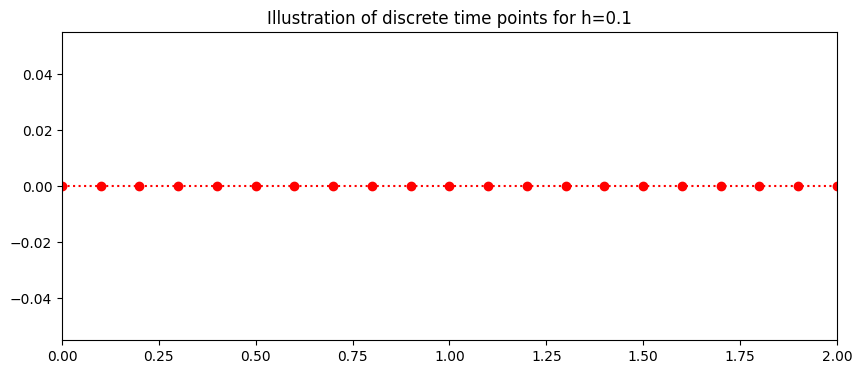

In [3]:
### Setting up time
t_end=2.0
t_start=0
N=20
h=(t_end-t_start)/(N)
time=np.arange(t_start,t_end+0.01,h)
fig = plt.figure(figsize=(10,4))
plt.plot(time,0*time,'o:',color='red')
plt.xlim((0,2))
plt.title('Illustration of discrete time points for h=%s'%(h))
plt.plot();

## Initial Condition
To get a specify solution to a first order initial value problem, an __initial condition__ is required.

For our population problem the intial condition is:
\begin{equation}
y(0)=10.
\end{equation}
This gives the analytic solution
\begin{equation}
y=10e^{\epsilon t}.
\end{equation}
### Growth rate
Let the growth rate
\begin{equation}
\epsilon=0.5
\end{equation}
giving the analytic solution.
\begin{equation}
y=10e^{0.5 t}.
\end{equation}
The plot below shows the exact solution on the discrete time steps.

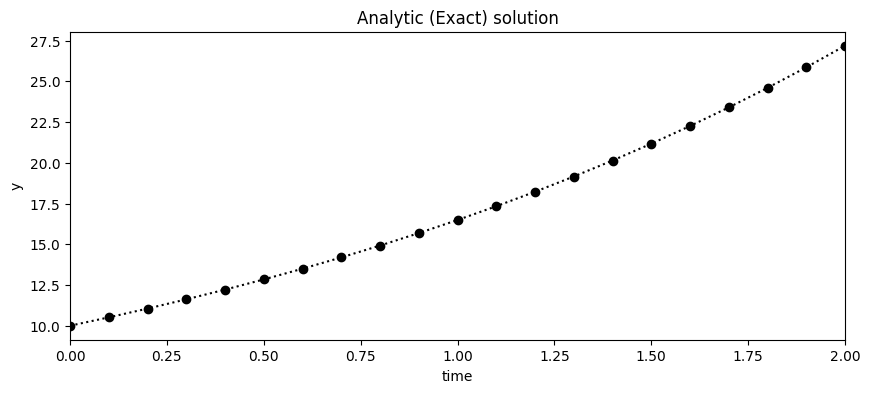

In [4]:
## Analytic Solution y
y=10*np.exp(0.5*time)

fig = plt.figure(figsize=(10,4))
plt.plot(time,y,'o:',color='black')
plt.xlim((0,2))
plt.xlabel('time')
plt.ylabel('y')
plt.title('Analytic (Exact) solution')
plt.plot();

## Numerical approximation of Population growth
The differential equation is transformed using the Euler method into a difference equation of the form
\begin{equation} w_{i+1}=w_{i}+h \epsilon w_i. \end{equation}
This approximates a series of of values $w_0, \ w_1, \ ..., w_{N}$.
For the specific example of the population equation the difference equation is
     \begin{equation} w_{i+1}=w_{i}+h 0.5 w_i. \end{equation}
where $w_0=10$. From this initial condition the series is approximated.
The plot below shows the exact solution $y$ in black circles and Euler approximation $w$ in blue squares.

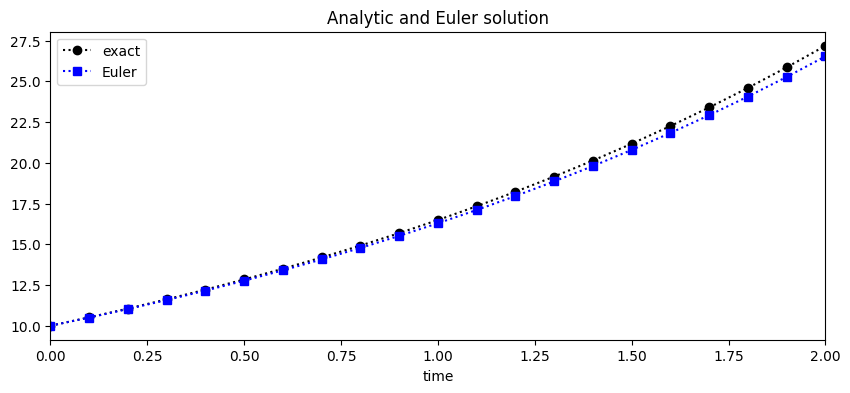

In [5]:
w=np.zeros(N+1)
w[0]=10
for i in range (0,N):
    w[i+1]=w[i]+h*(0.5)*w[i]

fig = plt.figure(figsize=(10,4))
plt.plot(time,y,'o:',color='black',label='exact')
plt.plot(time,w,'s:',color='blue',label='Euler')
plt.xlim((0,2))
plt.xlabel('time')
plt.legend(loc='best')
plt.title('Analytic and Euler solution')
plt.plot();